<a href="https://colab.research.google.com/github/mansi05-t/Heart-Disease-Prediction/blob/master/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others. Facts related to Heart Disease:

* One in every four deaths in the U.S. is related to heart disease.
* Coronary heart disease, arrhythmia, and myocardial infarction are some examples of heart disease.
* Heart disease might be treated with medication or surgery.
* Quitting smoking and exercising regularly can help prevent heart disease.

# 1.1 Loading the libraries

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
%matplotlib inline

In [4]:
from google.colab import files
files = files.upload()

Saving heart - heart.csv to heart - heart.csv


In [5]:
df = pd.read_csv('heart - heart.csv')

**This is how our data looks like**

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Size of Data**

In [ ]:
df.shape

(303, 14)

Our data has 303 rows and 14 features.

**Statistical Characteristics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Observations:

* The youngest heart patient is of age 29 and the eldest is of 77yrs.

* The maximum Cholesterol level is 564.

**Selecting one column**

In [ ]:
df.iloc[:,:1]

,age
0,63
1,37
2,41
3,56
4,57
...,...
298,57
299,45
300,68
301,57


**Columns**

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#  Find the Numerical Features,Categorical Features, Alphanumeric Features

# Attributes information

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target: Heart disease (0 = no, 1 = yes)


* **Categorical**: 

1. Sex
2. Chest pain type
3. Fasting blood sugar(fbs)
4. Resting electrocardiographic(RESTECG)
5. Exercise induced angina(exang)
6. Slope ST segment
7. Thalassemia (thal)
8. Target


* **Numerical** **Features**: 

1. Age (Continuous)
2. Resting blood pressure (trestbps)
3. Cholesterol
4. max_heart_rate_achieved(thalach)
5. ST depression(oldpeak)
6. number of major vessels(ca)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no null values.

**Renaming the columns**

In [7]:
df = df.rename(columns={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_bp','chol':'Cholesterol','fbs':'Fasting_blood_sugar','restecg':'Rest_ecg',
               'thalach':'Max_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'Slope','ca':'Num_major_vessels','thal':'Thalassemia','target':'Target'})

In [ ]:
df.head()

,Age,Sex,Chest_pain,Resting_bp,Cholesterol,Fasting_blood_sugar,Rest_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,Slope,Num_major_vessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  Quantitative: 

**Kdeplot showing Age**

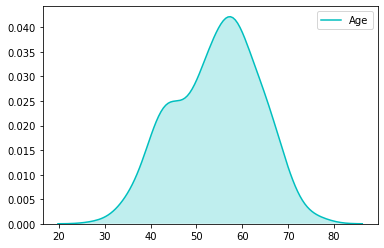

In [ ]:
sns.kdeplot(df['Age'], shade = True , color = 'c', Label = 'Age')
plt.show()

**Histogram showing cholesterol**

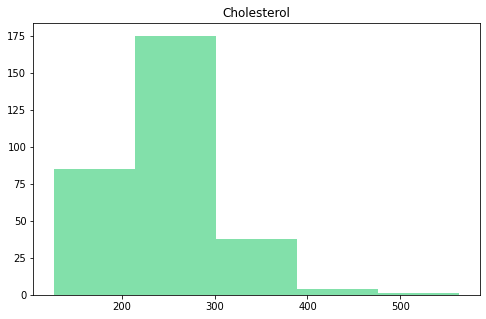

In [ ]:
df.hist(column = 'Cholesterol', bins = 5, color ="#82E0AA", grid = False, figsize=(8,5))
plt.show()

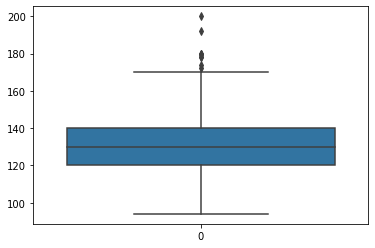

In [ ]:
sns.boxplot(data = df['Resting_bp'] )
plt.show()

**What is Box Plot?**

A box plot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

The line that divides the box into two parts is **Median**.

The dark spots are known as the **Outliers**. 
An outlier is defined as a data point that is located outside the whiskers of the box plot.



# Categorical vs. Quantitative

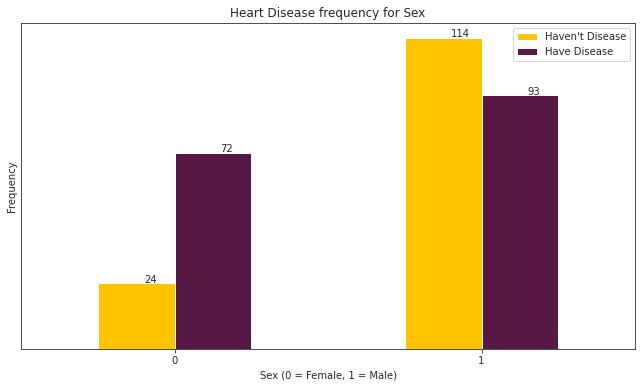

In [ ]:
ax = pd.crosstab(df.Sex,df.Target).plot(kind = 'bar',figsize =(11,6), color=['#FFC300','#581845' ])
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+0.5))
plt.title("Heart Disease frequency for Sex")
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
print("Gender (1 = Male , 0 = Female) "'\n')
df['Sex'].value_counts(normalize = False)

Gender (1 = Male , 0 = Female) 



1    207
0     96
Name: Sex, dtype: int64

In [ ]:
print("Target (1 = Yes , 0 = No) "'\n')
df['Target'].value_counts(normalize = False)

Target (1 = Yes , 0 = No) 



1    165
0    138
Name: Target, dtype: int64

Observations:

* In our dataset, there are 207(~ 68%) males and 96 (~ 32%) females. 

* 93 out of 207 males and 72 out of 96 females are heart patients.
* Out of 303 people, 165 (i.e. ~ 54%) are heart patients.

In [ ]:
#Male patients
a = len(df[(df.Sex==1)&(df['Target']==1)])

# Female Patients
b = len(df[(df.Sex==0)&(df['Target']==1)])

print("Total number of patients are : " , a+b)
print( "{:.2f}%".format(a/(a+b)*100),  "of the heart patients are Male")
print("{:.2f}%".format(b/(a+b)*100),  "of the heart patients are Female")

Total number of patients are :  165
56.36% of the heart patients are Male
43.64% of the heart patients are Female


#Bar plot for checking the both target vs Sex

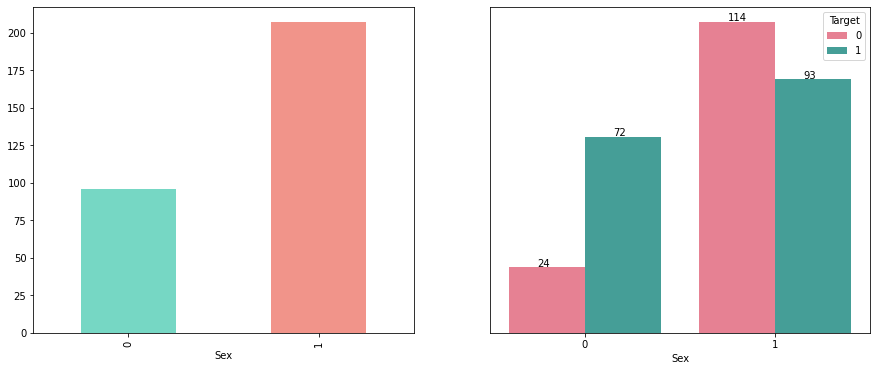

In [ ]:
# Subplot
fig, ax = plt.subplots(1,2,figsize = (15,6))

# bar plot using Groupby
df.groupby('Sex')['Target'].count().plot.bar(color = ['#76D7C4','#F1948A'], ax=ax[0])

# Count plot
ax = sns.countplot(x='Sex',hue='Target',data=df,palette='husl',ax= ax[1])
plt.ylabel("")
plt.yticks([])
plt.xlabel("Sex")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+0.5))
    
plt.show()

0 is female, 1 is male so, we estimate that females have more heart disease probability according to males.

# Violinplot plot for checking the fasting_blood_sugar and Age vs target'

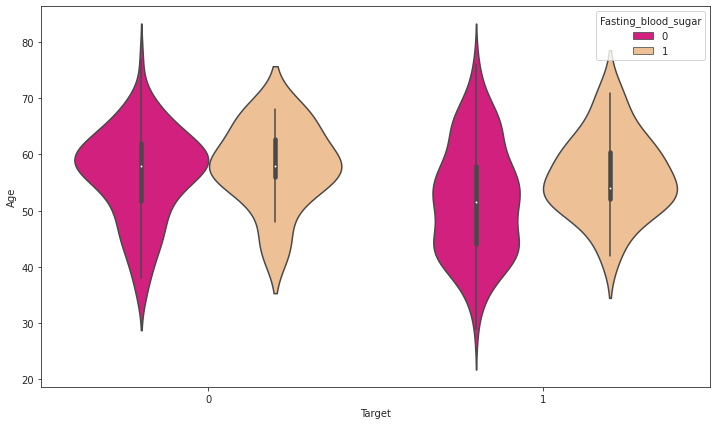

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (12,7))
sns.violinplot('Target','Age',hue='Fasting_blood_sugar', data=df, ax=ax, palette="Accent_r") 
plt.show()

Target 0 means no and 1 means yes.

The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

# Chest pain type

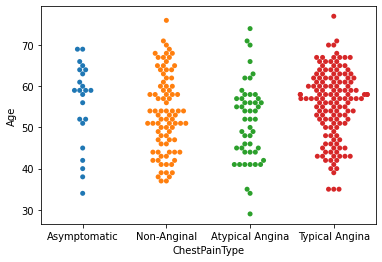

In [ ]:
result=[]
for i in df['Chest_pain']:
    if i == 0:
        result.append('Typical Angina')
    if i ==1:
        result.append('Atypical Angina')
    if i ==2:
        result.append('Non-Anginal')
    if i==3:
        result.append('Asymptomatic')
        
df['ChestPainType']=pd.Series(result)

sns.swarmplot(x='ChestPainType', y='Age', data=df)
plt.show()

# Chest pain type vs Target

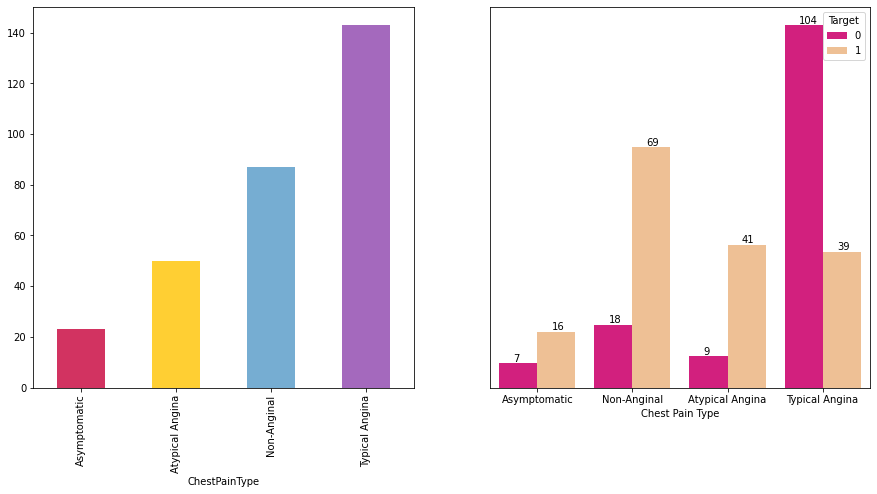

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (15,7))

df.groupby('ChestPainType')['Target'].count().plot.bar(color = ['#C70039','#FFC300','#5499C7','#8E44AD'] ,alpha = 0.8, ax=ax[0] )

ax = sns.countplot(x='ChestPainType',hue='Target',data=df,palette='Accent_r',ax= ax[1])
plt.ylabel("")
plt.yticks([])
plt.xlabel("Chest Pain Type")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+0.5))

plt.show()

We see that people with chest pain type - "Non-Anginal" and "Typical Angina",
 have more heart disease probability.

There are 143 people who has Typical Angina chest pain, out of which 104 are suffering from heart disease. 

# Box plot

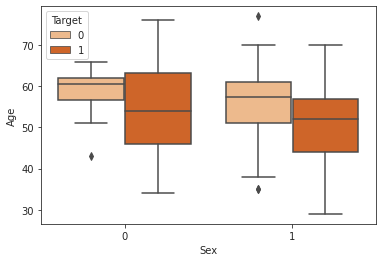

In [ ]:
sns.boxplot(x = 'Sex', y = 'Age', hue= 'Target', data = df, palette = 'Oranges')
plt.show()

Older people are more prone to heart disease.

#  Categorical vs. Categorical

* Categorical: target, Sex.


**Stacked bar chart**

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.

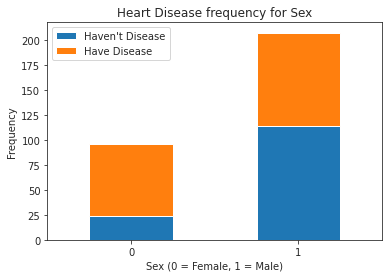

In [ ]:
a = pd.crosstab(df.Sex,df.Target)
a.plot.bar(stacked = True)
plt.title("Heart Disease frequency for Sex")
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

More women are suffering from the disease.

# Quantitative vs. Quantitative 

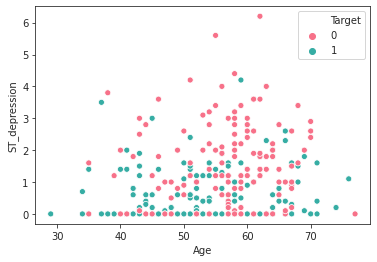

In [ ]:
# scatter plot for showing age & st_depression

sns.scatterplot(x = 'Age' , y = 'ST_depression',hue = 'Target', data = df  , palette= 'husl')
plt.show()

# Correlation plot

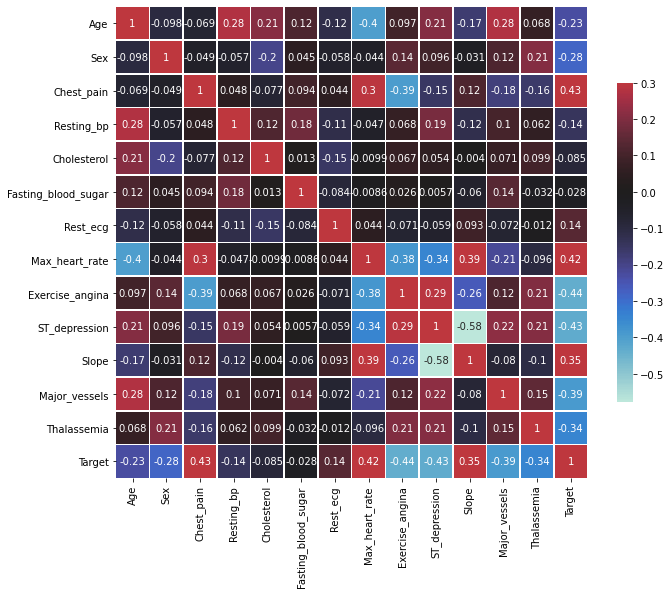

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

Chest pain, Maximum heart rate and slope are positively related to target.

# Building Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from pandas import set_option

**Train-test split**

In [9]:
x = df.drop("Target",axis=1)
y = df["Target"]
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [10]:
X_train.shape

(242, 13)

In [11]:
Y_train.shape

(242,)

In [12]:
X_test.shape

(61, 13)

In [13]:
Y_test.shape

(61,)

**K Nearest Neighbors**

In [14]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

**Neural Network**

In [15]:
# Build Neural network using keras
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 98        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


# Training and Validating Model

**K Nearest Neighbours**

In [17]:
# Accuracy Score 
score_knn = round(accuracy_score(Y_test,Y_pred_knn)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


**Neural Network**

In [18]:
# Train your neural network with 250 epochs
model.fit(X_train, Y_train, epochs=250, validation_data=(X_test, Y_test))

Epoch 1/250
8/8 [==============================] - 0s 21ms/step - loss: 15.2662 - accuracy: 0.5331 - val_loss: 13.1983 - val_accuracy: 0.5574
Epoch 2/250
8/8 [==============================] - 0s 3ms/step - loss: 12.4857 - accuracy: 0.5124 - val_loss: 10.8147 - val_accuracy: 0.5082
Epoch 3/250
8/8 [==============================] - 0s 3ms/step - loss: 10.1764 - accuracy: 0.4752 - val_loss: 8.8468 - val_accuracy: 0.4590
Epoch 4/250
8/8 [==============================] - 0s 3ms/step - loss: 8.2930 - accuracy: 0.4215 - val_loss: 7.5463 - val_accuracy: 0.4098
Epoch 5/250
8/8 [==============================] - 0s 3ms/step - loss: 7.2835 - accuracy: 0.3843 - val_loss: 6.9119 - val_accuracy: 0.3443
Epoch 6/250
8/8 [==============================] - 0s 3ms/step - loss: 6.7930 - accuracy: 0.3719 - val_loss: 6.7432 - val_accuracy: 0.3115
Epoch 7/250
8/8 [==============================] - 0s 3ms/step - loss: 6.5876 - accuracy: 0.3678 - val_loss: 6.6448 - val_accuracy: 0.2951
Epoch 8/250
8/8 [====

In [19]:
# Calculate the achieved accuracy
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

In [20]:
# Print the Accuracy achieved using Neural Network
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 83.61 %


**Observation:**

After analyzing the data and applying KNN and Neural Network we have concluded that the accuracy achieved using Neural network is around 84 percent which is higher than KNN.

# Overall Observations: 

1. In our dataset, there are 303 people, out of which 207(~ 68%) are males and  96 (~ 32%) are females. 

* 93 out of 207 males and 72 out of 96 females are heart patients.

2. Out of 303 people, 165 (i.e. ~ 54%) are heart patients.
* 56.36% of the heart patients are Male
* 43.64% of the heart patients are Female

3.  Women have more probability of having heart disease as compared to men.

4. Mostly Heart patients lies within the age group of 50-60
* The youngest heart patient is of age 29 and the eldest is of 77yrs.

5. People with chest pain type - "Non-Anginal" and "Typical Angina", have more heart disease probability.

* There are 143 people who has Typical Angina chest pain, out of which 104 are suffering from heart disease.